<a href="https://colab.research.google.com/github/elanchezhiyan2005/elan/blob/main/dev_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file created successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sender     3 non-null      object
 1   receiver   3 non-null      object
 2   subject    3 non-null      object
 3   timestamp  3 non-null      object
 4   content    3 non-null      object
dtypes: object(5)
memory usage: 252.0+ bytes
None


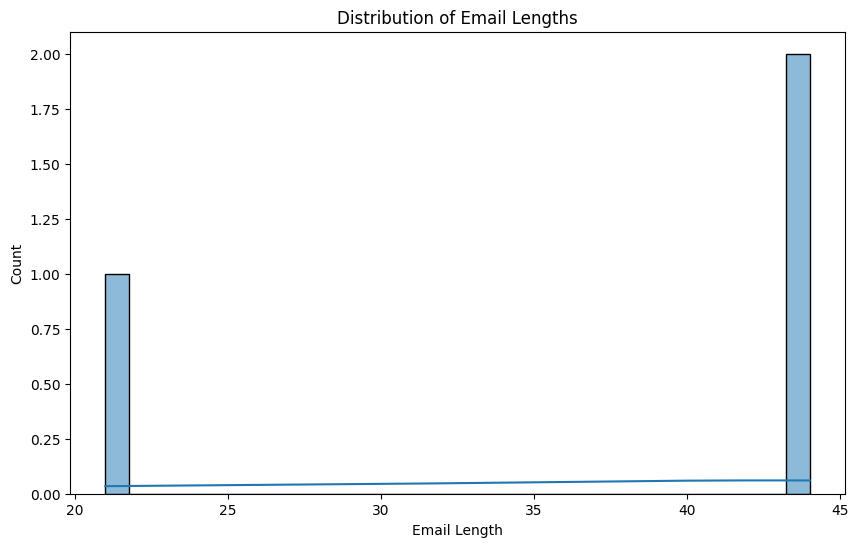

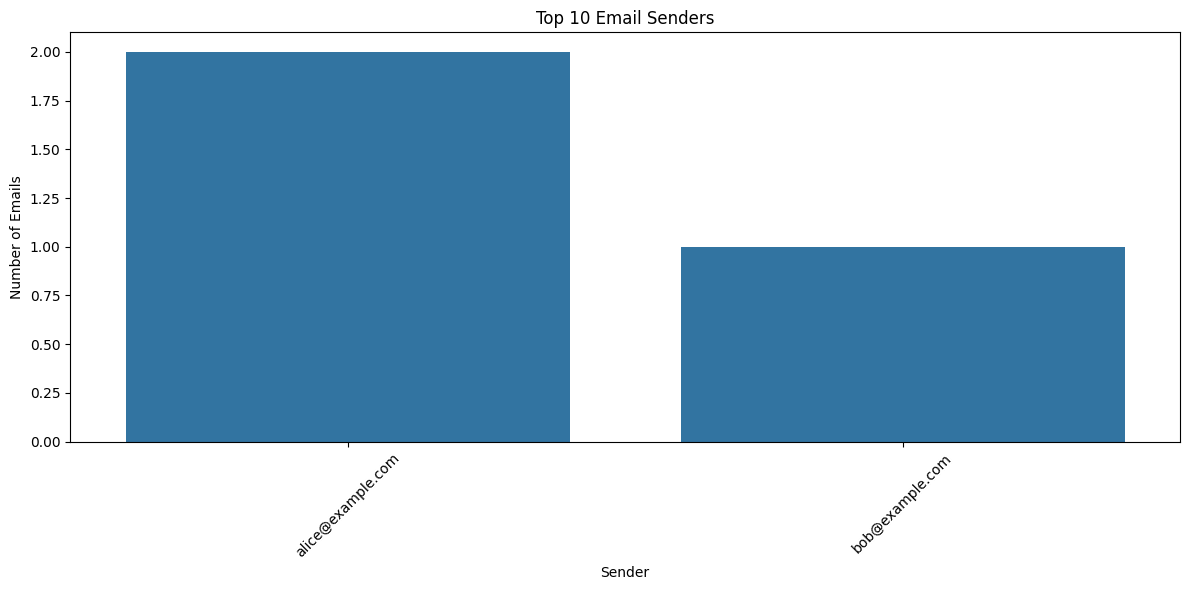

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


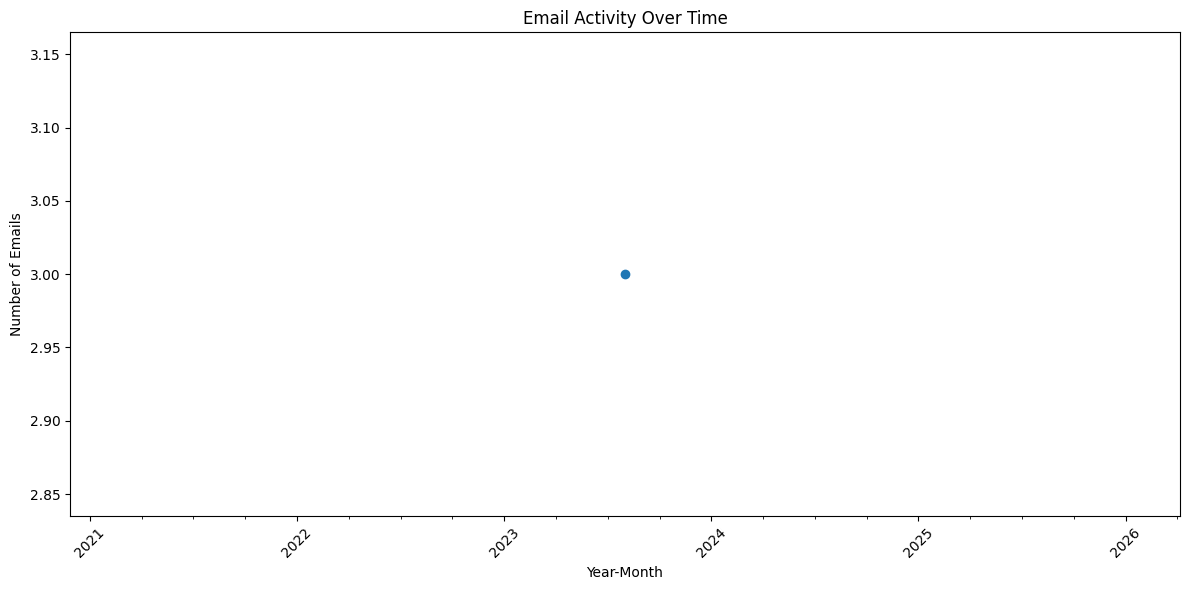

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create and save email data to CSV
data = {
    'sender': ['alice@example.com', 'bob@example.com', 'alice@example.com'],
    'receiver': ['bob@example.com', 'alice@example.com', 'carol@example.com'],
    'subject': ['Hello', 'Meeting Reminder', 'Project Update'],
    'timestamp': ['2023-08-01 10:00:00', '2023-08-02 14:30:00', '2023-08-03 09:15:00'],
    'content': [
        'Hi Bob,\n\nHow are you?',
        'Hi Alice,\n\nDon\'t forget the meeting at 3 PM.',
        'Hi Carol,\n\nHere\'s the latest project update.'
    ]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.to_csv('emails.csv', index=False)
print("CSV file created successfully.")

# Step 2: Load and process the CSV
df = pd.read_csv('emails.csv')
print(df.info())

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dropna(inplace=True)

# Step 3: Add email length column
df['email_length'] = df['content'].apply(len)

# Step 4: Plot distribution of email lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='email_length', bins=30, kde=True)
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.title('Distribution of Email Lengths')
plt.show()

# Step 5: Top 10 senders
top_senders = df['sender'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_senders.index, y=top_senders.values)
plt.xticks(rotation=45)
plt.xlabel('Sender')
plt.ylabel('Number of Emails')
plt.title('Top 10 Email Senders')
plt.tight_layout()
plt.show()

# Step 6: Email activity over time (by month)
df['year_month'] = df['timestamp'].dt.to_period('M')
email_activity = df.groupby('year_month').size()

plt.figure(figsize=(12, 6))
email_activity.plot(kind='line', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Emails')
plt.title('Email Activity Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Car dataset saved as car_data.csv.
      brand     model  engine_size_L  horsepower  mileage_kmpl fuel_type  \
0    Toyota   Corolla            1.8         139            17    Petrol   
1     Honda     Civic            2.0         158            16    Petrol   
2      Ford   Mustang            5.0         450             8    Petrol   
3       BMW  3 Series            2.0         255            15    Petrol   
4  Mercedes   C-Class            2.0         255            14    Petrol   

   price_lakhs  
0           10  
1           11  
2           55  
3           45  
4           50  


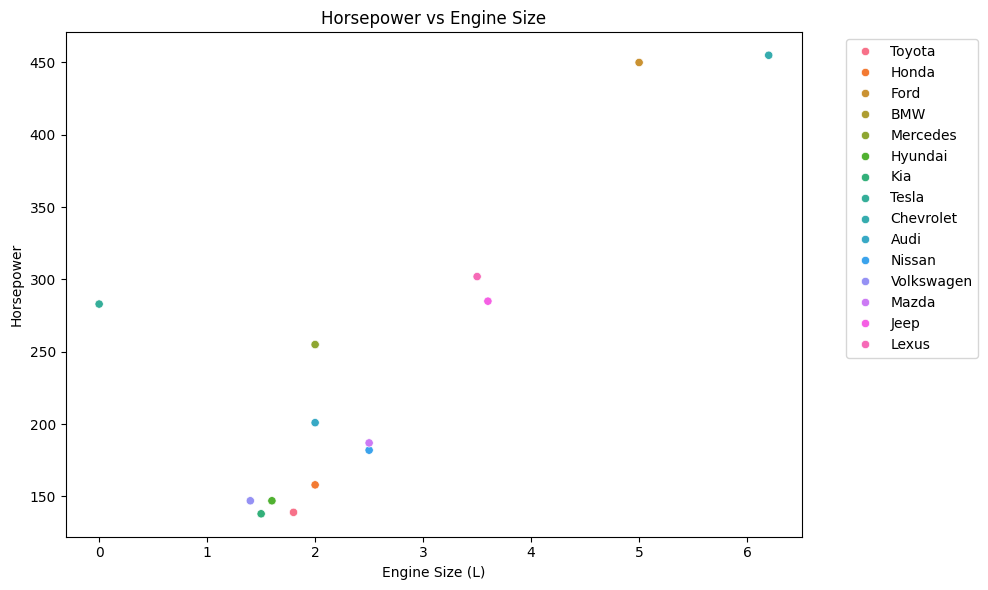

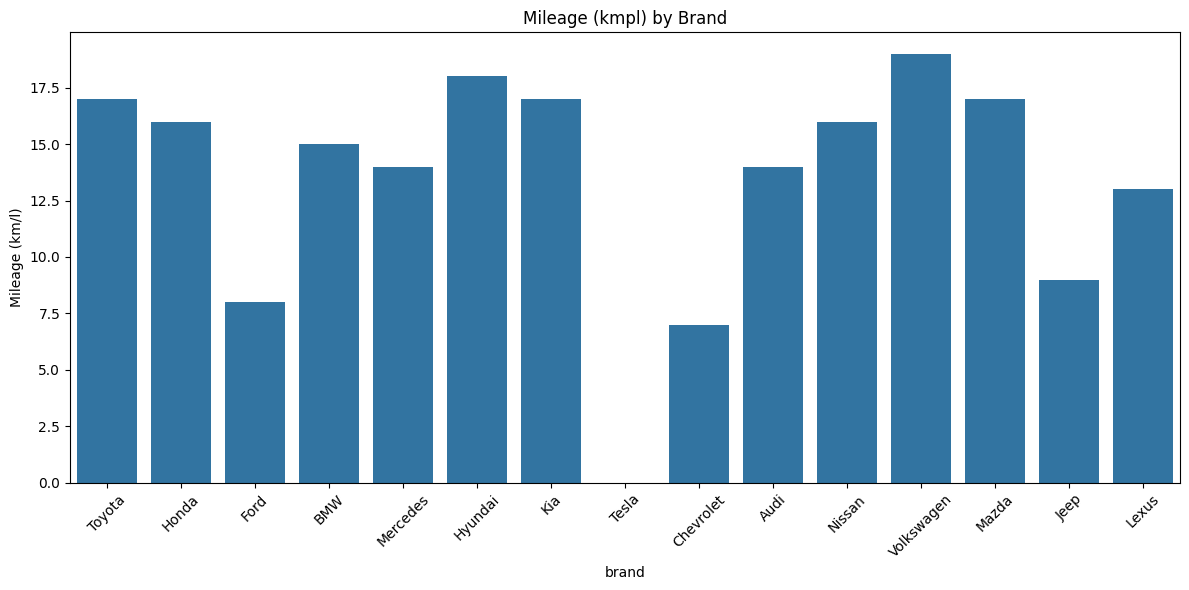

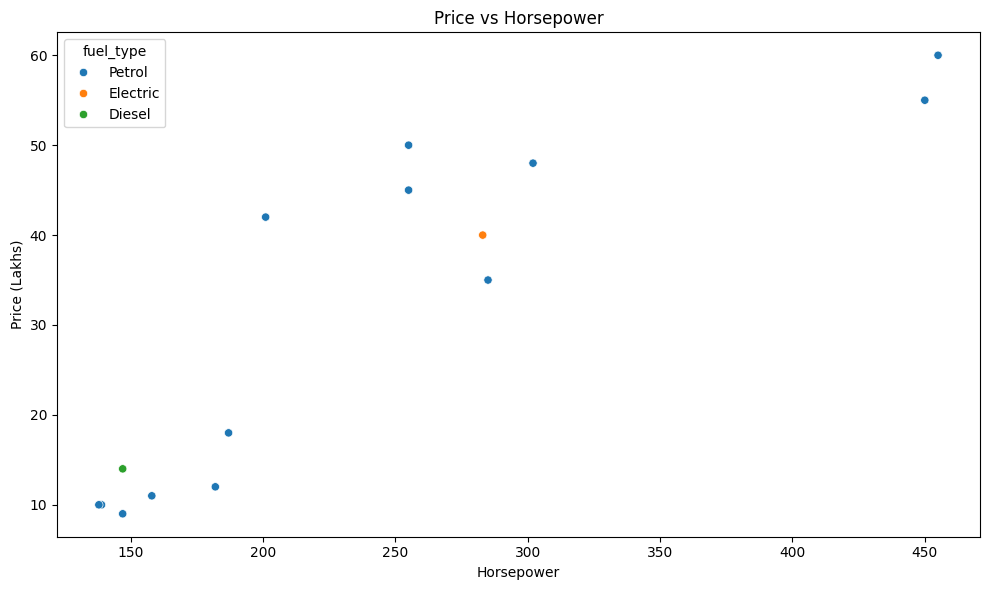

In [ ]:
import pandas as pd

data = {
    "brand": ["Toyota", "Honda", "Ford", "BMW", "Mercedes", "Hyundai", "Kia", "Tesla", "Chevrolet", "Audi", "Nissan", "Volkswagen", "Mazda", "Jeep", "Lexus"],
    "model": ["Corolla", "Civic", "Mustang", "3 Series", "C-Class", "Elantra", "Seltos", "Model 3", "Camaro", "A4", "Altima", "Golf", "CX-5", "Wrangler", "ES"],
    "engine_size_L": [1.8, 2.0, 5.0, 2.0, 2.0, 1.6, 1.5, 0.0, 6.2, 2.0, 2.5, 1.4, 2.5, 3.6, 3.5],
    "horsepower": [139, 158, 450, 255, 255, 147, 138, 283, 455, 201, 182, 147, 187, 285, 302],
    "mileage_kmpl": [17, 16, 8, 15, 14, 18, 17, 0, 7, 14, 16, 19, 17, 9, 13],
    "fuel_type": ["Petrol", "Petrol", "Petrol", "Petrol", "Petrol", "Petrol", "Petrol", "Electric", "Petrol", "Petrol", "Petrol", "Diesel", "Petrol", "Petrol", "Petrol"],
    "price_lakhs": [10, 11, 55, 45, 50, 9, 10, 40, 60, 42, 12, 14, 18, 35, 48]
}

df = pd.DataFrame(data)
df.to_csv("car_data.csv", index=False)
print("Car dataset saved as car_data.csv.")
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preview data
df = pd.read_csv("car_data.csv")
print(df.head())

# ✅ Transform: Add Power-to-Weight Ratio Estimate (simplified: hp / engine size)
df["power_to_engine"] = df["horsepower"] / df["engine_size_L"].replace(0, 0.1)

# ✅ Plot 1: Horsepower vs. Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="engine_size_L", y="horsepower", hue="brand")
plt.title("Horsepower vs Engine Size")
plt.xlabel("Engine Size (L)")
plt.ylabel("Horsepower")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ✅ Plot 2: Fuel Efficiency by Brand
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="brand", y="mileage_kmpl")
plt.xticks(rotation=45)
plt.title("Mileage (kmpl) by Brand")
plt.ylabel("Mileage (km/l)")
plt.tight_layout()
plt.show()

# ✅ Plot 3: Price vs Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="horsepower", y="price_lakhs", hue="fuel_type")
plt.title("Price vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Price (Lakhs)")
plt.tight_layout()
plt.show()
